In [1]:
import tpot

/home/bogdb/src/pdm-tpot/.venv/lib/python3.9/site-packages/tpot/builtins/__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")


In [4]:
import pandas as pd
import numpy as np
from tpot import TPOTClassifier


df_test=pd.read_csv("TestSet_klassification(8).csv")
df_train=pd.read_csv("TrainSet_klassification(7).csv")

X_train = df_train.drop(["income"], axis=1).values
y_train = df_train["income"].values

X_test = df_test.drop(["income_encoded"], axis=1).values
y_test = df_test["income_encoded"].values

In [5]:
#initializing tpot with parameters
#max_time_mins=None (per default) - here max time 4h
tpot = TPOTClassifier(generations=5, population_size=50,
                     cv=5, verbosity=2, n_jobs=16, max_time_mins=240,
                     periodic_checkpoint_folder='/content/results/classPreprocessed')

In [6]:
#starting the training
tpot.fit(X_train, y_train)

Version 0.12.1 of tpot is outdated. Version 0.12.2 was released Friday February 23, 2024.


Optimization Progress:   0%|          | 0/50 [00:00<?, ?pipeline/s]

/home/bogdb/src/pdm-tpot/.venv/lib/python3.9/site-packages/tpot/builtins/__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")
/home/bogdb/src/pdm-tpot/.venv/lib/python3.9/site-packages/tpot/builtins/__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")
/home/bogdb/src/pdm-tpot/.venv/lib/python3.9/site-packages/tpot/builtins/__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")
/home/bogdb/src/pdm-tpot/.venv/lib/python3.9/site-packages/tpot/builtins/__init__.py:36: UserWarning: Warning: opti


Generation 1 - Current best internal CV score: 0.8772355349324691

Generation 2 - Current best internal CV score: 0.8772355349324691

Generation 3 - Current best internal CV score: 0.8772355349324691

Generation 4 - Current best internal CV score: 0.8772784525499698

Generation 5 - Current best internal CV score: 0.8788300837725135

Best pipeline: ExtraTreesClassifier(GaussianNB(input_matrix), bootstrap=False, criterion=gini, max_features=0.1, min_samples_leaf=1, min_samples_split=16, n_estimators=100)


TPOTClassifier(generations=5, max_time_mins=240, n_jobs=16,
               periodic_checkpoint_folder='/content/results/classPreprocessed',
               population_size=50, verbosity=2)

In [7]:
import sklearn.metrics as skm
from sklearn.metrics import roc_auc_score

#prediction
y_pred = tpot.predict(X_test)

# prediction for the AUC-ROC-Score by only using the positive classes
y_pred_proba = tpot.predict_proba(X_test)[:, 1]


print("RESULTS OF BEST MODEL:\n")

print(f"F1-Score:                   {skm.f1_score(y_test, y_pred)}")
print(f"AUC-ROC Score:              {roc_auc_score(y_test, y_pred_proba)}")
print(f"Accuracy:                   {skm.accuracy_score(y_test, y_pred)}")
print(f"Precision:                  {skm.precision_score(y_test, y_pred)}")
print(f"Recall:                     {skm.recall_score(y_test, y_pred)}")

RESULTS OF BEST MODEL:

F1-Score:                   0.7413876758854925
AUC-ROC Score:              0.9537933624472891
Accuracy:                   0.9017511520737327
Precision:                  0.7709384460141272
Recall:                     0.7140186915887851


In [35]:
#from sklearn.svm import SVC

# SVC with a linear kernel and probability=True
#clf = SVC(kernel='linear', probability=True)

#clf.fit(X_train, y_train)

#res = clf.predict_proba(X_test)

In [8]:
# output of values to dictionary
metrics_dict = {
    'Metric': [
        'F1-Score',
        'AUC-ROC Score',
        'Accuracy',
        'Precision',
        'Recall',
    ],
    'Value': [
        skm.f1_score(y_test, y_pred),
        roc_auc_score(y_test, y_pred_proba),
        skm.accuracy_score(y_test, y_pred),
        skm.precision_score(y_test, y_pred),
        skm.recall_score(y_test, y_pred)
    ]
}

#to df
metrics_df = pd.DataFrame(metrics_dict)


print(metrics_df)

metrics_df.to_csv('tpot_classification_preprosessing_TEST_metrics.csv', index=False)


          Metric     Value
0       F1-Score  0.741388
1  AUC-ROC Score  0.953793
2       Accuracy  0.901751
3      Precision  0.770938
4         Recall  0.714019


In [9]:
from IPython.display import FileLink
FileLink('tpot_classification_preprosessing_TEST_metrics.csv')

/home/bogdb/src/pdm-tpot/tpot_classification_preprosessing_TEST_metrics.csv

In [10]:
#showing best models as there is no leaderboard
import pandas as pd

# Converting all evaluated models to a list of tuples
my_dict = list(tpot.evaluated_individuals_.items())

# empty list for dictionaries
model_list = []

for model in my_dict:
    model_name = model[0]
    model_info = model[1]
    cv_score = model_info.get('internal_cv_score')  # Pull out cv_score as a column (i.e., sortable)
    
    # Append dictionary to the list
    model_list.append({
        'model': model_name,
        'cv_score': cv_score,
        'model_info': model_info,
    })

# Convert list to a DataFrame
model_scores = pd.DataFrame(model_list)

# Sort the DataFrame by cv_score
model_scores = model_scores.sort_values('cv_score', ascending=False)

# output
model_scores

,model,cv_score,model_info
269,"ExtraTreesClassifier(GaussianNB(input_matrix),...",0.878830,"{'generation': 5, 'mutation_count': 3, 'crosso..."
275,"GradientBoostingClassifier(input_matrix, Gradi...",0.877710,"{'generation': 5, 'mutation_count': 1, 'crosso..."
210,ExtraTreesClassifier(RobustScaler(input_matrix...,0.877278,"{'generation': 4, 'mutation_count': 3, 'crosso..."
52,"GradientBoostingClassifier(input_matrix, Gradi...",0.877236,"{'generation': 1, 'mutation_count': 1, 'crosso..."
255,GradientBoostingClassifier(StandardScaler(inpu...,0.877192,"{'generation': 5, 'mutation_count': 1, 'crosso..."
...,...,...,...
292,"LinearSVC(input_matrix, LinearSVC__C=0.001, Li...",0.512912,"{'generation': 5, 'mutation_count': 3, 'crosso..."
116,"SGDClassifier(input_matrix, SGDClassifier__alp...",0.512869,"{'generation': 2, 'mutation_count': 1, 'crosso..."
254,"SGDClassifier(MinMaxScaler(input_matrix), SGDC...",0.487131,"{'generation': 5, 'mutation_count': 2, 'crosso..."
136,RandomForestClassifier(RBFSampler(input_matrix...,-inf,"{'generation': 2, 'mutation_count': 1, 'crosso..."


In [11]:
model_scores.to_csv('TPOT_preprocessed_TEST_classification_model_scores.csv', index=False)


In [12]:
from IPython.display import FileLink
FileLink('TPOT_preprocessed_TEST_classification_model_scores.csv')

/home/bogdb/src/pdm-tpot/TPOT_preprocessed_TEST_classification_model_scores.csv

In [13]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

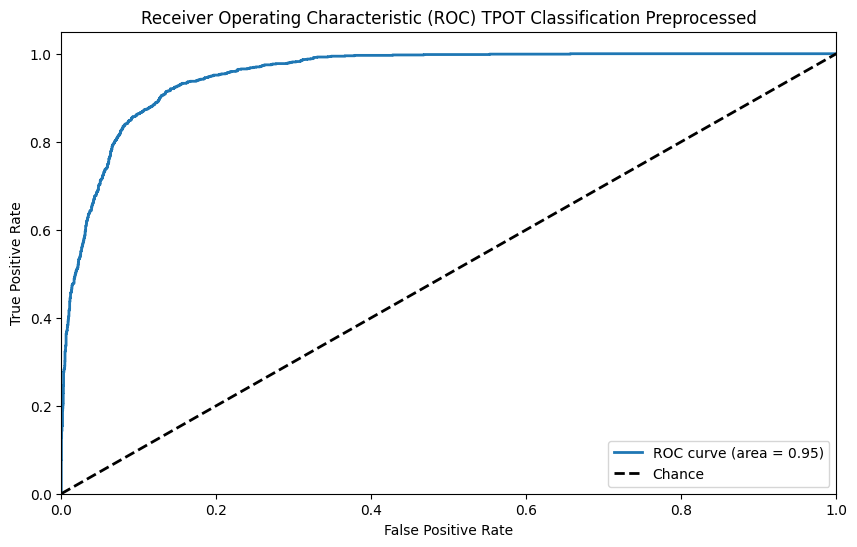

In [14]:
from sklearn.metrics import roc_curve, auc, roc_auc_score

y_pred = tpot.predict(X_test)

# Predicting the probabilities for the positive class
y_pred_proba = tpot.predict_proba(X_test)[:, 1]

# Calculating ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve using Matplotlib with Seaborn styling
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})', lw=2)
plt.plot([0, 1], [0, 1], 'k--', label='Chance', lw=2)  # Diagonal line for random guessing
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) TPOT Classification Preprocessed')
plt.legend(loc="lower right")

# Save the plot as a PNG file
plt.savefig('tpot_TEST_roc_curve_preprocessed.png', dpi=300)
plt.show()

In [61]:
tpot.export('tpot_classification_preprocessed')